In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import polyfit, polyval
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator


## Sensitivity variations

### Elevation: Mantaining slope 46.5 and slope aspect 176.1 of South 1
-3000: My Mac \
2619: Cluster (25300577 (1001-6000), 25301091 (6001-11001), 25301231 (11001-16001), 25301269 (16001-21001)) South 1


##### Elevation -3000m
##### Slope 46.5
##### Slope Aspect 176.1

In [2]:
#
South2= 'SensitivityVariations/South2/2025-09-09_2329_output.txt'

df2 = pd.read_csv(South2, sep=r'\s+')
df2

,LaskarTimestep,time_years,ecc,obl,Lsp,Tsurf,SF12,ForcedConv,FreeConv,TotalSubl
0,16001,-5000000,0.092828,32.484497,159.274770,171.740542,0.484380,0.022430,0.008804,0.031234
1,16002,-4999000,0.092276,32.615709,165.338190,171.692844,0.491009,0.025836,0.011108,0.036944
2,16003,-4998000,0.091664,32.746939,171.328949,171.642767,0.497664,0.029717,0.013871,0.043588
3,16004,-4997000,0.090993,32.877596,177.365988,171.584355,0.504312,0.034171,0.017160,0.051331
4,16005,-4996000,0.090430,33.006657,-176.538338,171.529600,0.510899,0.039248,0.021078,0.060326
...,...,...,...,...,...,...,...,...,...,...
4996,20997,-4000,0.089582,24.736458,-135.201046,159.465849,0.178417,0.001100,0.000000,0.001100
4997,20998,-3000,0.090497,24.843271,-128.653555,159.504770,0.181086,0.001260,0.000000,0.001260
4998,20999,-2000,0.091571,24.954663,-121.964549,159.545215,0.183911,0.001436,0.000000,0.001436
4999,21000,-1000,0.092414,25.070010,-115.454439,159.605535,0.186884,0.001627,0.000000,0.001627


In [3]:
years2= (df2['time_years'])
obl2=(df2['obl'])
Subl2=(df2['TotalSubl'])
temp2=(df2['Tsurf'])


In [4]:
#total accumulative sublimation in steps of 1000years. After 1000y value *1000, then 2000y subl_past+subl_pres *1000. 
cumulative2=[]
val=0
for i in Subl2:
    val+= i*1000
    cumulative2.append(val)


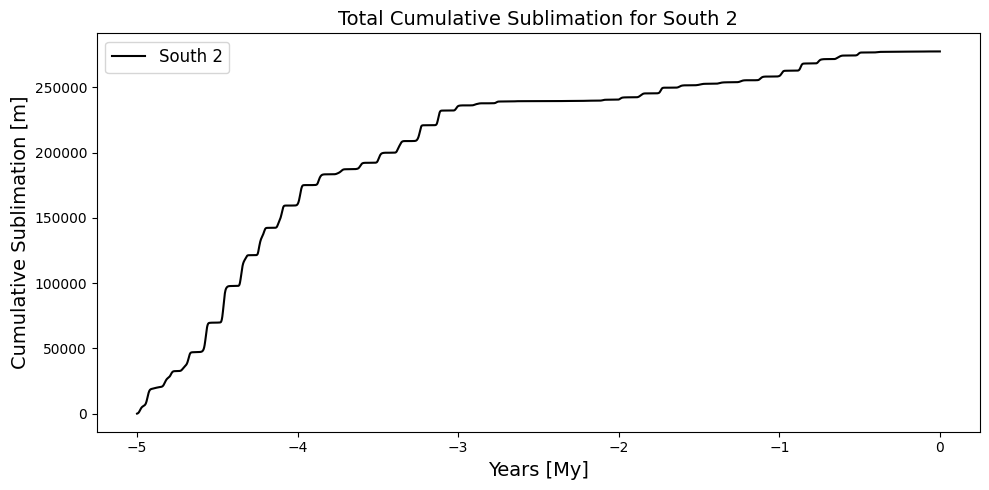

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(years2/1000000, cumulative2,color='black',label='South 2')  
#plt.plot(years3/1000000,cumulative3000,color='red', label = 'Elevation: -3000m ')

plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation [m]',fontsize=14)
plt.title('Total Cumulative Sublimation for South 2',fontsize=14)

plt.legend(fontsize=12)

plt.savefig('South2Total')
plt.tight_layout()
plt.show()


In [6]:
topS2= '../Ridges/South2.csv'
S2=pd.read_csv(topS2)
S2

,Distance (Km),Longitude,Latitude,HiRISE DTM Stamps (mean)
0,0.000,109.396,-55.140,2061.553
1,0.118,109.396,-55.142,2029.929
2,0.236,109.396,-55.144,2017.523
3,0.353,109.396,-55.146,1903.680
4,0.471,109.396,-55.148,1865.995
5,0.589,109.397,-55.150,1860.614
6,0.707,109.397,-55.152,1860.614
7,0.825,109.397,-55.154,1830.266
8,0.942,109.397,-55.156,1827.423
9,1.060,109.397,-55.158,1790.886


In [86]:
dist2=np.array(S2['Distance (Km)'].tolist())
longitude2=np.array(S2['Longitude'].tolist())
latitude2= np.array(S2['Latitude'].tolist())
elevation2= np.array(S2['HiRISE DTM Stamps (mean)'].tolist())

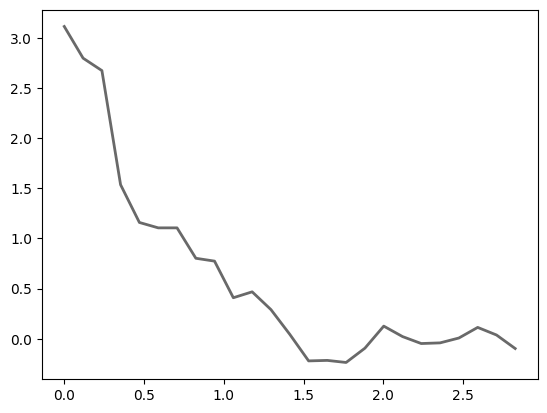

In [87]:
plt.plot(dist2, elevation2/100-17.5, color='dimgray', linewidth=2, label='Topography')


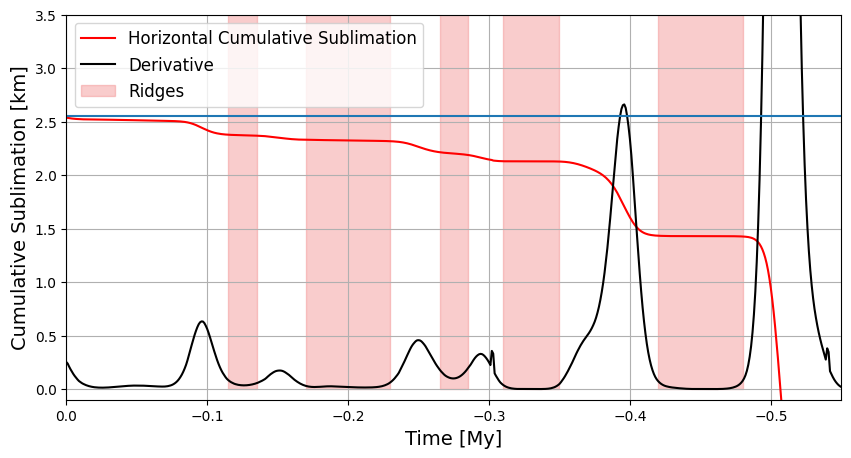

In [88]:
horiz2=cumulative2/np.sin(46.8*np.pi/180)
deriv2=np.gradient(horiz2)
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(years2/1000000,horiz2/1000 -378.21,color='red',label='Horizontal Cumulative Sublimation')
ax.plot(dist2, elevation2, color='dimgray', linewidth=2)
ax.plot(years2/1000000,deriv2/10,color='black',label='Derivative')
ax.fill_between([-0.48,-0.42],10e6, color='lightcoral', alpha=0.4,label='Ridges')  # area under curve
ax.fill_between([-0.35,-0.31],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.285,-0.265],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.23,-0.17],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.135,-0.115],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.axhline(2.552)



plt.xlim(-0.55,0)
plt.ylim(-.1,3.5)
plt.gca().invert_xaxis()

plt.xlabel('Time [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation [km]',fontsize=14)
plt.grid(True)
plt.legend(loc='upper left',fontsize=12)
plt.savefig('RidgesSouth2')

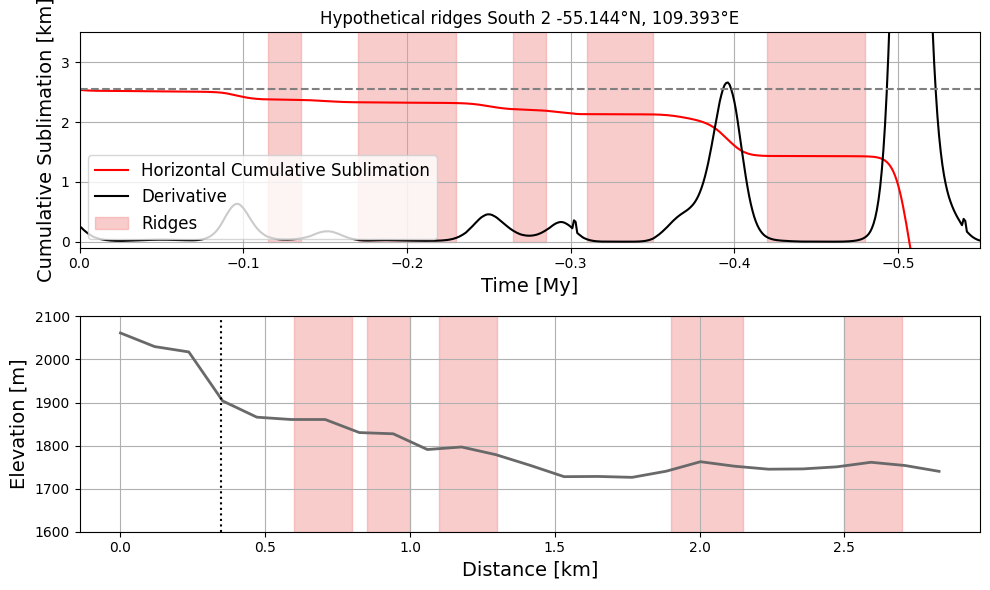

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# --- Top plot: Sublimation vs Time ---
ax1.plot(years2/1e6, horiz2/1000 - 378.21, color='red', label='Horizontal Cumulative Sublimation')
ax1.plot(years2/1e6, deriv2/10, color='black', label='Derivative')
ax1.axhline(2.552, color='gray', linestyle='--')

# Highlight ridges
ax1.fill_between([-0.48, -0.42], 1e7, color='lightcoral', alpha=0.4, label='Ridges')
ax1.fill_between([-0.35, -0.31], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.285, -0.265], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.23, -0.17], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.135, -0.115], 1e7, color='lightcoral', alpha=0.4)

# Formatting for sublimation axis
ax1.set_xlim(-0.55, 0)
ax1.set_ylim(-0.1, 3.5)
ax1.invert_xaxis()
ax1.set_xlabel('Time [My]', fontsize=14)
ax1.set_ylabel('Cumulative Sublimation [km]', fontsize=14)
ax1.grid(True)
ax1.legend(loc='lower left', fontsize=12)

# --- Bottom plot: Topographic profile ---
ax2.plot(dist2, elevation2, color='dimgray', linewidth=2)
ax2.set_xlabel('Distance [km]', fontsize=14)
ax2.set_ylabel('Elevation [m]', fontsize=14)
ax2.grid(True)

ax2.fill_between([0.6,0.8],2750, color='lightcoral', alpha=0.4,label='Ridges') 
ax2.fill_between([0.85,1.],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([1.1,1.3],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([1.9,2.15],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([2.5,2.7],2750, color='lightcoral', alpha=0.4)  
ax2.axvline(0.348,linestyle=':',color='black',label='Present Day Scarp')
ax2.scatter(0.17, 1575, color='red', marker='*', s=100, label='1',zorder=3)


ax2.set_ylim(1600,2100)
ax1.set_title('Hypothetical ridges South 2 -55.144°N, 109.393°E')
plt.tight_layout()


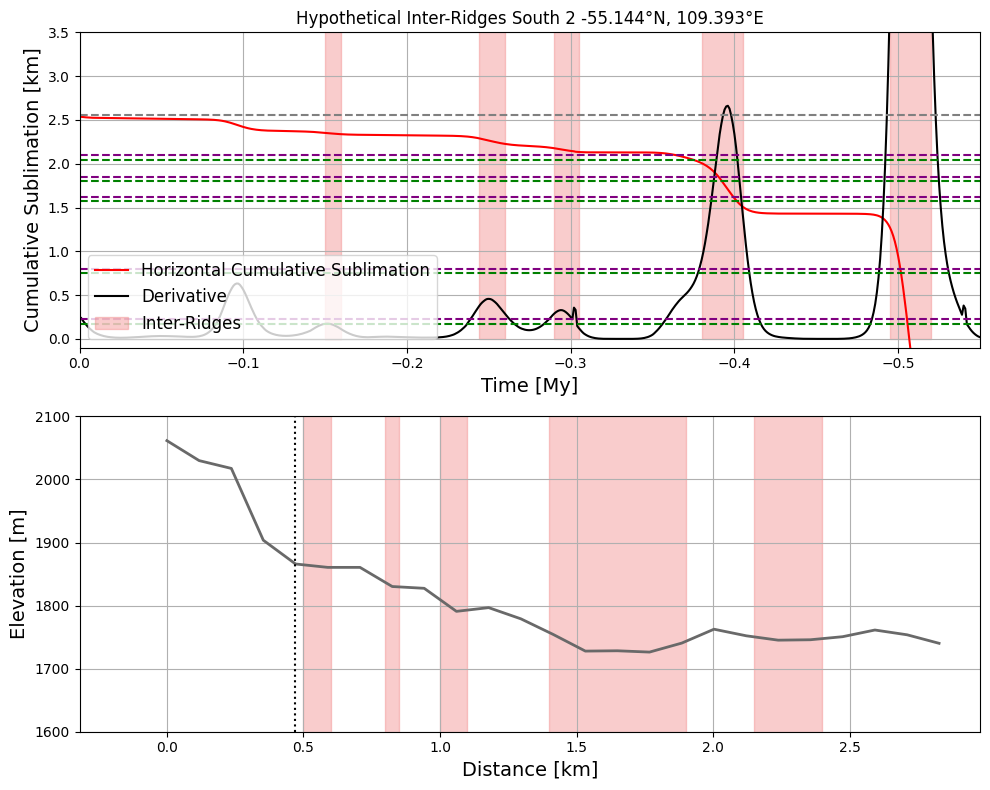

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# --- Top plot: Sublimation vs Time ---
ax1.plot(years2/1e6, horiz2/1000 - 378.21, color='red', label='Horizontal Cumulative Sublimation')
ax1.plot(years2/1e6, deriv2/10, color='black', label='Derivative')
ax1.axhline(2.552, color='gray', linestyle='--')

# Highlight ridges
ax1.fill_between([-0.405, -0.38], 1e7, color='lightcoral', alpha=0.4,label='Inter-Ridges')
ax1.fill_between([-0.305, -0.29], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.52, -0.495], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.26, -0.244], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.16, -0.15], 1e7, color='lightcoral', alpha=0.4)

# Formatting for sublimation axis
ax1.set_xlim(-0.55, 0)
ax1.set_ylim(-0.1, 3.5)
ax1.invert_xaxis()
ax1.set_xlabel('Time [My]', fontsize=14)
ax1.set_ylabel('Cumulative Sublimation [km]', fontsize=14)
ax1.grid(True)
ax1.legend(loc='lower left', fontsize=12)

# --- Bottom plot: Topographic profile ---
ax2.plot(dist2, elevation2, color='dimgray', linewidth=2)
ax2.set_xlabel('Distance [km]', fontsize=14)
ax2.set_ylabel('Elevation [m]', fontsize=14)
ax2.grid(True)

ax2.fill_between([0.8,0.85],2750, color='lightcoral', alpha=0.4,label='Inter-Ridges') 
ax2.fill_between([1.,1.1],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([1.4,1.9],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([2.15,2.4],2750, color='lightcoral', alpha=0.4)  
ax2.fill_between([0.5,0.6],2750, color='lightcoral', alpha=0.4)  
ax2.axvline(0.47,linestyle=':',color='black',label='Present Day Scarp')
ax2.scatter(-0.17, 1575, color='red', marker='*', s=100, label='1',zorder=3)

# Distances ridge-scarp
distan2=[0.706-0.25,0.95-0.25,1.18-0.25,2-0.25,2.58-0.25]

for i in distan2:
    ax1.axhline(2.552-i,linestyle='--',color='purple')
    ax1.axhline(2.5-i,linestyle='--',color='green')



ax2.set_ylim(1600,2100)
ax1.set_title('Hypothetical Inter-Ridges South 2 -55.144°N, 109.393°E')
plt.tight_layout()


In [94]:
distan2

[0.358, 0.602, 0.832, 1.6520000000000001, 2.232]

## South 5

In [12]:
South5= 'SensitivityVariations/South5/2025-09-09_2351_output.txt'

df5 = pd.read_csv(South5, sep=r'\s+')
df5

,LaskarTimestep,time_years,ecc,obl,Lsp,Tsurf,SF12,ForcedConv,FreeConv,TotalSubl
0,16001,-5000000,0.092828,32.484497,159.274770,173.459903,0.484380,0.026145,0.011352,0.037497
1,16002,-4999000,0.092276,32.615709,165.338190,173.382294,0.491009,0.029801,0.013896,0.043698
2,16003,-4998000,0.091664,32.746939,171.328949,173.299726,0.497664,0.033923,0.016890,0.050814
3,16004,-4997000,0.090993,32.877596,177.365988,173.214289,0.504312,0.038628,0.020444,0.059072
4,16005,-4996000,0.090430,33.006657,-176.538338,173.125815,0.510899,0.043924,0.024601,0.068525
...,...,...,...,...,...,...,...,...,...,...
4996,20997,-4000,0.089582,24.736458,-135.201046,162.099402,0.178417,0.002428,0.000089,0.002517
4997,20998,-3000,0.090497,24.843271,-128.653555,162.093900,0.181086,0.002736,0.000122,0.002858
4998,20999,-2000,0.091571,24.954663,-121.964549,162.097070,0.183911,0.003074,0.000163,0.003237
4999,21000,-1000,0.092414,25.070010,-115.454439,162.117724,0.186884,0.003433,0.000212,0.003645


In [132]:
years5= (df5['time_years'])
obl5=(df5['obl'])
Subl5=(df5['TotalSubl'])
temp5=(df5['Tsurf'])


In [14]:
#total accumulative sublimation in steps of 1000years. After 1000y value *1000, then 2000y subl_past+subl_pres *1000. 
cumulative5=[]
val=0
for i in Subl5:
    val+= i*1000
    cumulative5.append(val)


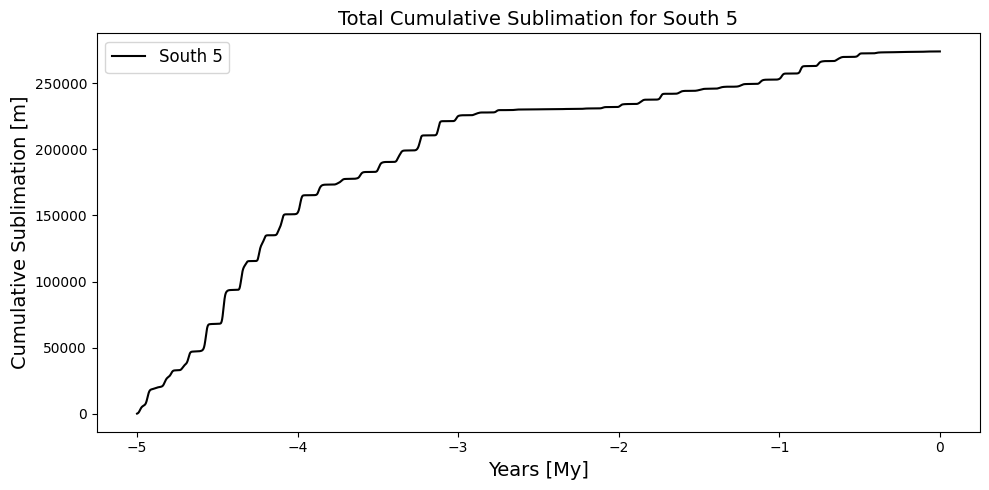

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(years5/1000000, cumulative5,color='black',label='South 5')  

plt.xlabel('Years [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation [m]',fontsize=14)
plt.title('Total Cumulative Sublimation for South 5',fontsize=14)

plt.legend(fontsize=12)

plt.savefig('South5Total')
plt.tight_layout()
plt.show()


In [16]:
horiz5=cumulative5/np.sin(35.63*np.pi/180)

deriv5=np.gradient(horiz5)


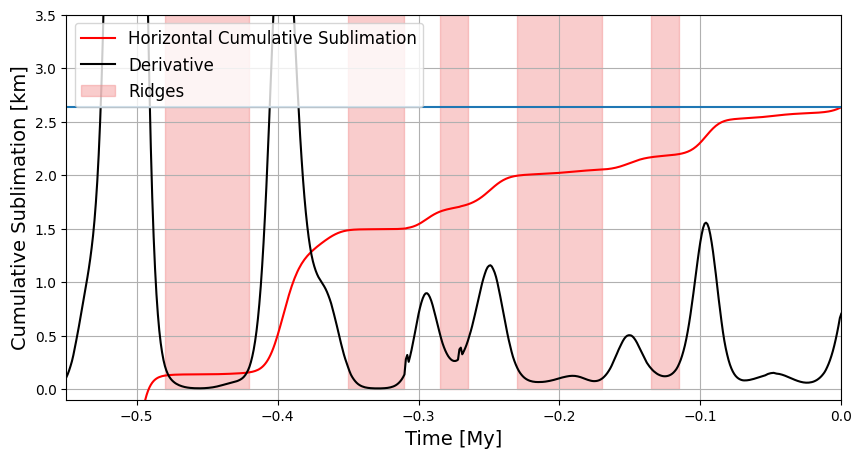

In [17]:
horiz5
deriv5=np.gradient(horiz5)
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(years5/1000000,horiz5/1000-467.85,color='red',label='Horizontal Cumulative Sublimation')
ax.plot(years5/1000000,deriv5/10,color='black',label='Derivative')
ax.fill_between([-0.48,-0.42],10e6, color='lightcoral', alpha=0.4,label='Ridges')  # area under curve
ax.fill_between([-0.35,-0.31],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.285,-0.265],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.23,-0.17],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.fill_between([-0.135,-0.115],10e6, color='lightcoral', alpha=0.4)  # area under curve
ax.axhline(2.64)

plt.xlim(-0.55,0)
plt.ylim(-.1,3.5)
plt.xlabel('Time [My]',fontsize=14)
plt.ylabel('Cumulative Sublimation [km]',fontsize=14)
plt.grid(True)
plt.legend(loc='upper left',fontsize=12)
plt.savefig('RidgesSouth5')

In [18]:
topS5= '../Ridges/South5.csv'
S5=pd.read_csv(topS5)
S5

,Distance (Km),Longitude,Latitude,HiRISE DTM Stamps (2) (mean)
0,0.000,89.776,-57.170,-220.265
1,0.119,89.776,-57.172,-226.088
2,0.239,89.776,-57.174,-320.243
3,0.358,89.776,-57.176,-395.860
4,0.477,89.776,-57.178,-396.858
5,0.597,89.776,-57.180,-409.501
6,0.716,89.776,-57.182,-424.645
7,0.835,89.776,-57.184,-428.913
8,0.954,89.776,-57.186,-431.905
9,1.074,89.776,-57.188,-455.208


In [19]:
dist5=np.array(S5['Distance (Km)'].tolist())
longitude5=np.array(S5['Longitude'].tolist())
latitude5= np.array(S5['Latitude'].tolist())
elevation5= np.array(S5['HiRISE DTM Stamps (2) (mean)'].tolist())

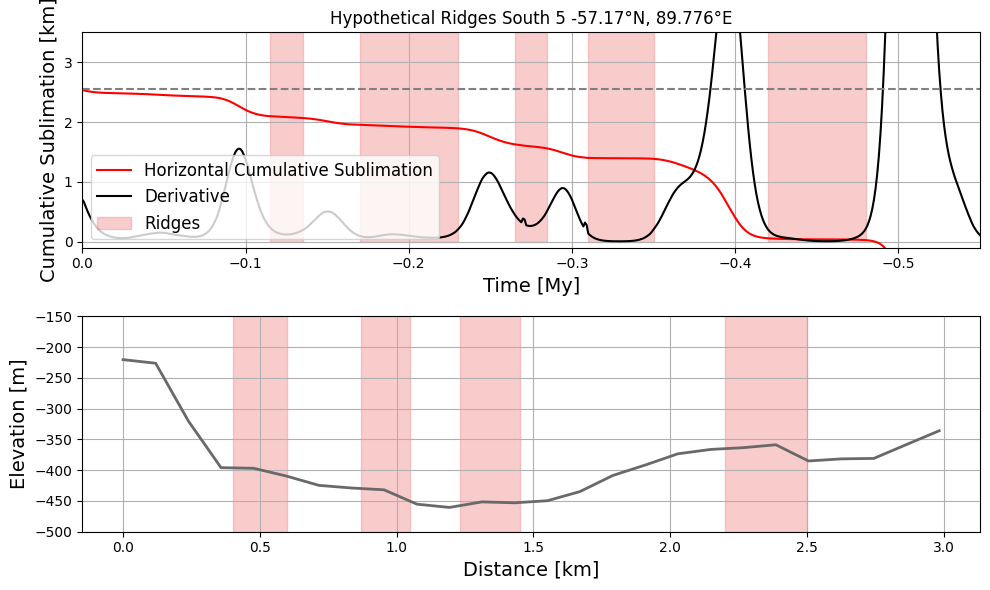

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# --- Top plot: Sublimation vs Time ---
ax1.plot(years5/1e6, horiz5/1000 - 467.95, color='red', label='Horizontal Cumulative Sublimation')
ax1.plot(years5/1e6, deriv5/10, color='black', label='Derivative')
ax1.axhline(2.552, color='gray', linestyle='--')

# Highlight ridges
ax1.fill_between([-0.48, -0.42], 1e7, color='lightcoral', alpha=0.4, label='Ridges')
ax1.fill_between([-0.35, -0.31], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.285, -0.265], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.23, -0.17], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.135, -0.115], 1e7, color='lightcoral', alpha=0.4)

# Formatting for sublimation axis
ax1.set_xlim(-0.55, 0)
ax1.set_ylim(-0.1, 3.5)
ax1.invert_xaxis()
ax1.set_xlabel('Time [My]', fontsize=14)
ax1.set_ylabel('Cumulative Sublimation [km]', fontsize=14)
ax1.grid(True)
ax1.legend(loc='lower left', fontsize=12)

# --- Bottom plot: Topographic profile ---
ax2.plot(dist5, elevation5, color='dimgray', linewidth=2)
ax2.set_xlabel('Distance [km]', fontsize=14)
ax2.set_ylabel('Elevation [m]', fontsize=14)
ax2.grid(True)
ax2.fill_between([0.4,0.6],-700, color='lightcoral', alpha=0.4,label='Ridges')  # area under curve
ax2.fill_between([0.87,1.05],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.fill_between([1.23,1.45],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.fill_between([2.2,2.5],-700, color='lightcoral', alpha=0.4)  # area under curve
#plt.fill_between([2.5,2.7],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.set_ylim(-500,-150)

ax1.set_title('Hypothetical Ridges South 5 -57.17°N, 89.776°E')
plt.tight_layout()


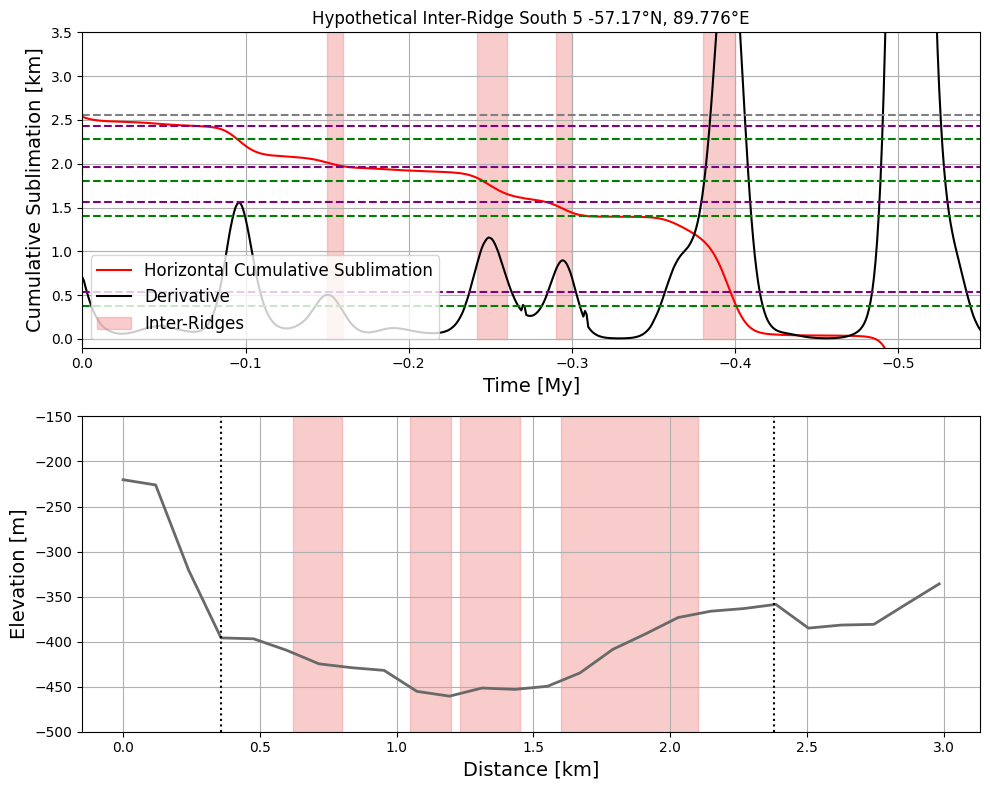

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# --- Top plot: Sublimation vs Time ---
ax1.plot(years5/1e6, horiz5/1000 - 467.95, color='red', label='Horizontal Cumulative Sublimation')
ax1.plot(years5/1e6, deriv5/10, color='black', label='Derivative')
ax1.axhline(2.552, color='gray', linestyle='--')

# Highlight ridges
#ax1.fill_between([-0.48, -0.42], 1e7, color='lightcoral', alpha=0.4, label='Ridges')
ax1.fill_between([-0.4, -0.38], 1e7, color='lightcoral', alpha=0.4,label='Inter-Ridges')
ax1.fill_between([-0.3, -0.29], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.26, -0.242], 1e7, color='lightcoral', alpha=0.4)
ax1.fill_between([-0.16, -0.15], 1e7, color='lightcoral', alpha=0.4)

# Formatting for sublimation axis
ax1.set_xlim(-0.55, 0)
ax1.set_ylim(-0.1, 3.5)
ax1.invert_xaxis()
ax1.set_xlabel('Time [My]', fontsize=14)
ax1.set_ylabel('Cumulative Sublimation [km]', fontsize=14)
ax1.grid(True)
ax1.legend(loc='lower left', fontsize=12)

# --- Bottom plot: Topographic profile ---
ax2.plot(dist5, elevation5, color='dimgray', linewidth=2)
ax2.set_xlabel('Distance [km]', fontsize=14)
ax2.set_ylabel('Elevation [m]', fontsize=14)
ax2.grid(True)
ax2.fill_between([0.62,0.8],-700, color='lightcoral', alpha=0.4,label='Inter-Ridges')  # area under curve
ax2.fill_between([1.05,1.2],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.fill_between([1.23,1.45],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.fill_between([1.6,2.1],-700, color='lightcoral', alpha=0.4)  # area under curve
#plt.fill_between([2.5,2.7],-700, color='lightcoral', alpha=0.4)  # area under curve
ax2.set_ylim(-500,-150)
ax2.axvline(0.358,linestyle=':',color='black')
ax2.axvline(2.38,linestyle=':',color='black')

distan5=[0.48-0.358,0.95-0.358,1.35-0.358,2.38-0.358]

for i in distan5:
    ax1.axhline(2.552-i,linestyle='--',color='purple')
    ax1.axhline(2.4-i,linestyle='--',color='green')



ax1.set_title('Hypothetical Inter-Ridge South 5 -57.17°N, 89.776°E')
plt.tight_layout()
